# custom-svm
Project for the **Combinatorial Decision Making and Optimization** course - Master in AI, *Alma Mater Studiorum*.
#### Credits:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

Import the required libraries, in particular the custom implementation of SVM contained in the `svm.py` module, 
the custom implementation of multiclass SVm contained in `multiclass_svm.py` module and the dataset 
generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` 
and the number of features `N_FEAT`.

In [12]:
from svm import SVM
from multiclass_svm import MulticlassSVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

RND = 42
N_SAMP = 200
N_FEAT = 2

Define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations:
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result (only for our svm).

In [13]:
def fit_and_predict(svm: SVM,
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray,
                    l_bound: Optional[float] = None,
                    h_bound: Optional[float] = None,
                    is_binary_custom_svm: Optional[bool] = True):
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_train)
    print('Accuracy on the training set: {0:.2f}%'.format(accuracy_score(y_train, y_pred) * 100))
    y_pred = svm.predict(X_test)
    print('Accuracy on the test set: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    if is_binary_custom_svm:
        if l_bound is not None and h_bound is not None:
            svm.plot2D(X_train, y_train, l_bound, h_bound)
        else:
            svm.plot2D(X_train, y_train)

## 1. Sample datasets

Test the SVM on a linearly separable dataset.

3 support vectors found out of 150 data points:
1) X: [0.634 0.536]	y: 1
2) X: [0.282 0.177]	y: -1
3) X: [0.887 0.78 ]	y: -1
Bias of the hyper-plane: 23.732
Weights of the hyper-plane: [-238.21   239.245]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


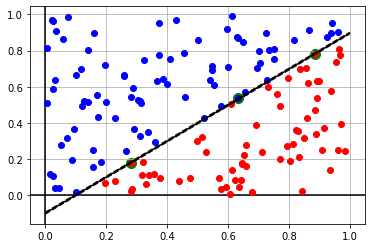

In [14]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = linear_data_generator(n_samples=N_SAMP,
                                                                         n_features=N_FEAT,
                                                                         random_state=RND)
svm_lin = SVM()
fit_and_predict(svm_lin, X_train_lin, X_test_lin, y_train_lin, y_test_lin, l_bound=0., h_bound=1.)

Test the SVM on the same dataset, but fitting only on the support vectors found.

3 support vectors found out of 3 data points:
1) X: [0.634 0.536]	y: 1
2) X: [0.282 0.177]	y: -1
3) X: [0.887 0.78 ]	y: -1
Bias of the hyper-plane: 23.732
Weights of the hyper-plane: [-238.21   239.245]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


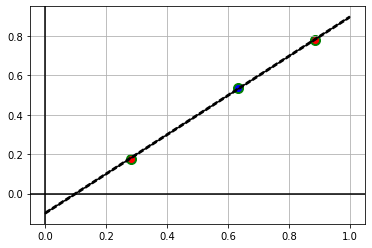

In [15]:
X_sv_lin, y_sv_lin = svm_lin.sv_X, svm_lin.sv_y
svm_lin = SVM()
fit_and_predict(svm_lin, X_sv_lin, X_test_lin, y_sv_lin, y_test_lin, l_bound=0., h_bound=1.)

Test the SVM on a non-linear separable dataset.

13 support vectors found out of 150 data points:
1) X: [-0.418 -0.376]	y: 1
2) X: [-0.597  0.082]	y: 1
3) X: [-0.232  0.836]	y: -1
4) X: [0.452 0.439]	y: 1
5) X: [-0.188 -0.942]	y: -1
6) X: [-0.678 -0.3  ]	y: -1
7) X: [-0.632  0.642]	y: -1
8) X: [0.705 0.512]	y: -1
9) X: [-0.875  0.316]	y: -1
10) X: [0.555 0.716]	y: -1
11) X: [0.836 0.159]	y: -1
12) X: [ 0.64  -0.571]	y: -1
13) X: [ 0.514 -0.416]	y: 1
Bias of the hyper-plane: -1.721
Accuracy on the training set: 100.00%
Accuracy on the test set: 98.00%


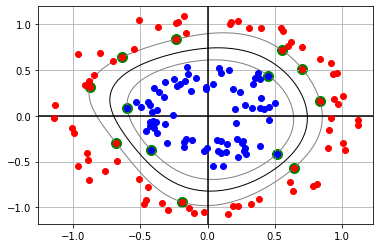

In [16]:
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = non_linear_data_generator(n_samples=N_SAMP,
                                                                                         random_state=RND)
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin, X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin)

Test the SVM on the same dataset, but fitting only on the support vectors found.

13 support vectors found out of 13 data points:
1) X: [-0.418 -0.376]	y: 1
2) X: [-0.597  0.082]	y: 1
3) X: [-0.232  0.836]	y: -1
4) X: [0.452 0.439]	y: 1
5) X: [-0.188 -0.942]	y: -1
6) X: [-0.678 -0.3  ]	y: -1
7) X: [-0.632  0.642]	y: -1
8) X: [0.705 0.512]	y: -1
9) X: [-0.875  0.316]	y: -1
10) X: [0.555 0.716]	y: -1
11) X: [0.836 0.159]	y: -1
12) X: [ 0.64  -0.571]	y: -1
13) X: [ 0.514 -0.416]	y: 1
Bias of the hyper-plane: -1.845
Accuracy on the training set: 100.00%
Accuracy on the test set: 98.00%


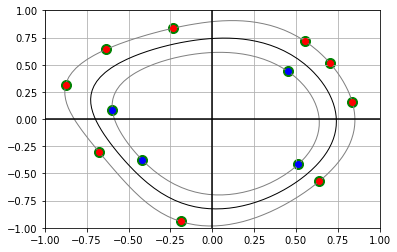

In [17]:
X_sv_nonlin, y_sv_nonlin = svm_nonlin.sv_X, svm_nonlin.sv_y
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin, X_sv_nonlin, X_test_nonlin, y_sv_nonlin, y_test_nonlin)

## 2. Sensor dataset

The following SVM models are tested on a dataset constructed by simulating measurements of distances between sensors and IoT devices in a building.

The task of the classifier is to predict the room in which the device is located given the input of the sensors.

Utility function to show a room.

In [18]:
def show_room(img_name: str):
    img = plt.imread(img_name)
    plt.figure(figsize = (15,15))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In the following figure, it is given a floor with 2 rooms (blue and red) and 5 sensors.

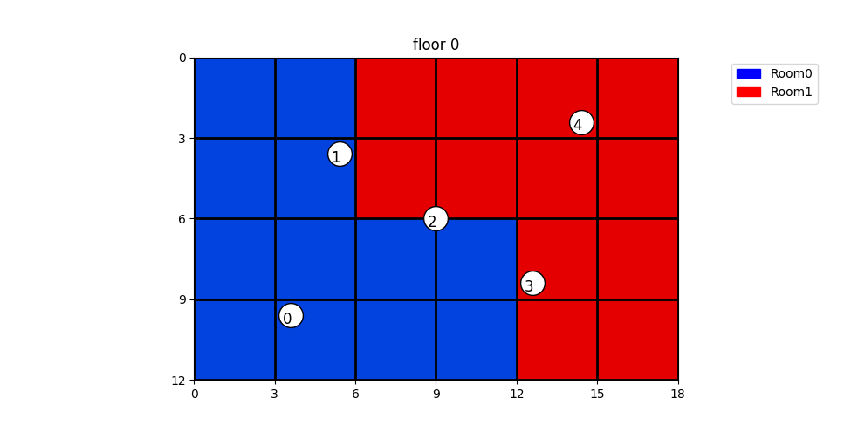

In [19]:
show_room('data/data_png/2_rooms.png')

Utility function to read and process the dataset.

In [20]:
def read_dataset(f_name: str):
    X_raw = []
    y_raw = []
    with open(f_name, "r") as file:
        for line in file:
            features = line.split(',')[:-1]
            X_raw.append(features)
            y_raw.append(line.split(',')[-1])
    X = np.array(X_raw).astype(np.float)
    y_tmp = np.array(y_raw).astype(np.float)
    y = np.fromiter((-1 if yi == 0 else 1 for yi in y_tmp), y_tmp.dtype)
    return train_test_split(X, y, test_size=0.2, random_state=RND)

Test the SVM on a dataset sampled from the previous room.

In [21]:
f_name_bin ="data/data_2_rooms.txt"
X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens = read_dataset(f_name_bin)
svm_binsens = SVM(kernel="rbf")
fit_and_predict(svm_binsens, X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens)

41 support vectors found out of 800 data points:
1) X: [0.113 0.188 7.896 6.334 1.476]	y: 1.0
2) X: [0.005 7.303 0.428 0.055 0.   ]	y: -1.0
3) X: [ 0.049 10.118  0.483  0.098  0.147]	y: 1.0
4) X: [ 0.156  0.046  0.64  18.746  0.003]	y: -1.0
5) X: [0.227 0.052 0.31  1.101 0.032]	y: -1.0
6) X: [ 0.523  2.078 50.     0.819  0.167]	y: -1.0
7) X: [0.018 1.42  0.201 0.014 0.049]	y: 1.0
8) X: [ 0.202 29.573  2.001  0.058  0.064]	y: 1.0
9) X: [ 0.606 16.052 12.902  0.166  0.13 ]	y: 1.0
10) X: [0.102 3.405 0.29  0.094 0.045]	y: 1.0
11) X: [0.048 0.051 0.    0.449 0.141]	y: 1.0
12) X: [ 0.     0.092  0.433 46.922  0.184]	y: 1.0
13) X: [ 0.245  0.537 50.     2.089  0.529]	y: 1.0
14) X: [ 0.     0.069  0.468 50.     0.024]	y: 1.0
15) X: [ 0.428 16.658  2.593  0.154  0.005]	y: -1.0
16) X: [ 0.108  0.113  1.859 50.     0.226]	y: 1.0
17) X: [1.598 6.387 4.58  0.239 0.07 ]	y: -1.0
18) X: [ 0.046  0.137  5.55  16.912  1.057]	y: -1.0
19) X: [ 0.155  0.154  1.318 50.     0.128]	y: -1.0
20) X: [ 0.507 50.

Compare the previous result with `sklearn.SVC`

In [22]:
svc = SVC(kernel="rbf", gamma="auto")
fit_and_predict(svc, X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens, is_binary_custom_svm=False)

Accuracy on the training set: 95.12%
Accuracy on the test set: 92.50%


In the following figure, it is given a building with 2 floors, 10 rooms and 20 sensors.

A new dataset is sampled.

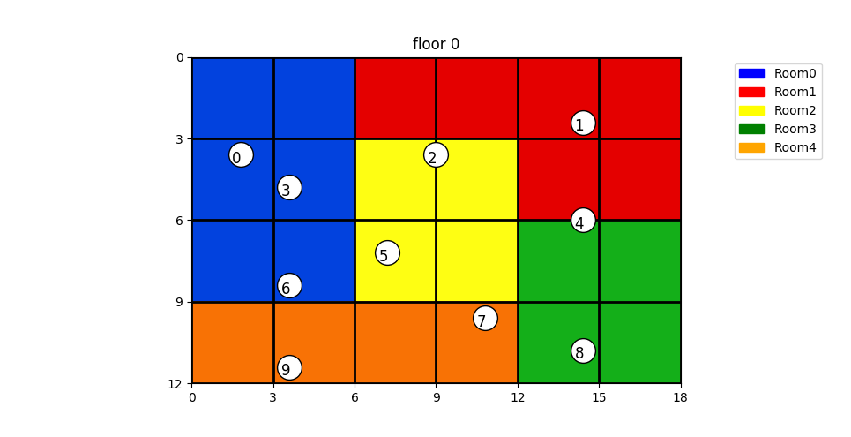

In [23]:
show_room('data/data_png/10_rooms_floor0.png')

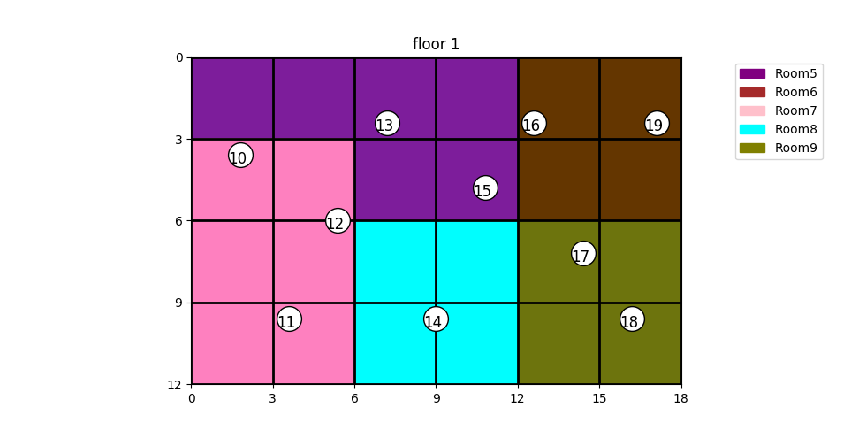

In [24]:
show_room('data/data_png/10_rooms_floor1.png')

Test the MulticlassSVM from the dataset sampled from the previous rooms.

In [32]:
f_name_mul ="data/data_10_rooms.txt"
X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens = read_dataset(f_name_mul)
svm_mulsens = MulticlassSVM(kernel="rbf")
fit_and_predict(svm_mulsens, X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens, is_binary_custom_svm=False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()